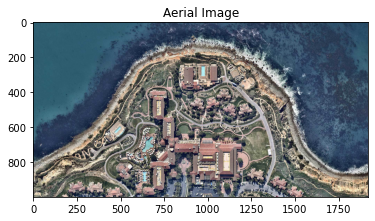

In [61]:
#Object detection of similar color
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Reading the image
#img = cv2.imread('howcanyousee.png')
img = cv2.imread('Images/clear-aerial-image-RanchoPalosVerdes-California.jpg')
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Showing the output
plt.imshow(imgRGB)
plt.title('Aerial Image')
plt.show()

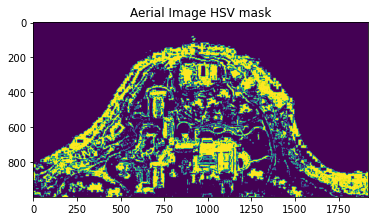

In [85]:
# convert to hsv colorspace
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#lower bound and upper bound for colors

#lower_bound = np.array([50, 20, 20])   
#upper_bound = np.array([100, 255, 255])
lower_bound = np.array([0, 0, 0]) #(5,50,50) - (15,255,255)
upper_bound = np.array([20,255,255])

# find the colors within the boundaries
mask = cv2.inRange(hsv, lower_bound, upper_bound)

plt.imshow(mask)
plt.title('Aerial Image HSV mask')
plt.show()

[[1 1 1]
 [1 1 1]
 [1 1 1]]


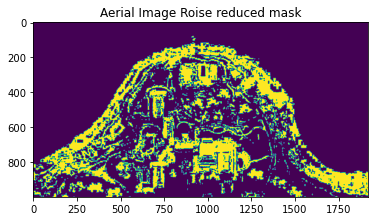

In [86]:
#define kernel size  
kernel = np.ones((3,3),np.uint8)
print(kernel)
# Remove unnecessary noise from mask
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

plt.imshow(mask)
plt.title('Aerial Image Roise reduced mask')
plt.show()

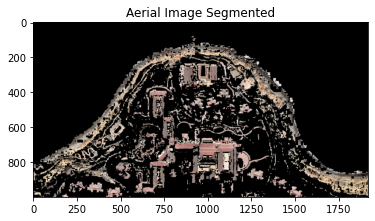

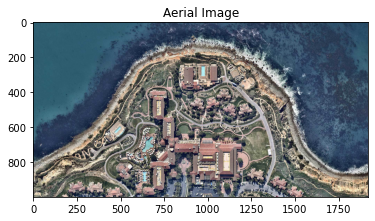

In [87]:
# Segment only the detected region
segmented_img = cv2.bitwise_and(imgRGB, imgRGB, mask=mask)

plt.imshow(segmented_img)
plt.title('Aerial Image Segmented')
plt.show()

plt.imshow(imgRGB)
plt.title('Aerial Image')
plt.show()